### PAGE VIEWS

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

1. Importing data

In [3]:
df = pd.read_csv('datasets/fcc-forum-pageviews.csv')
df['date'] = pd.to_datetime(df['date'])
df['date'] = df['date'].dt.date
df = df.set_index('date')
df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


2. Filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.

In [4]:
df = df[(df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))]
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


3. Creating a line chart

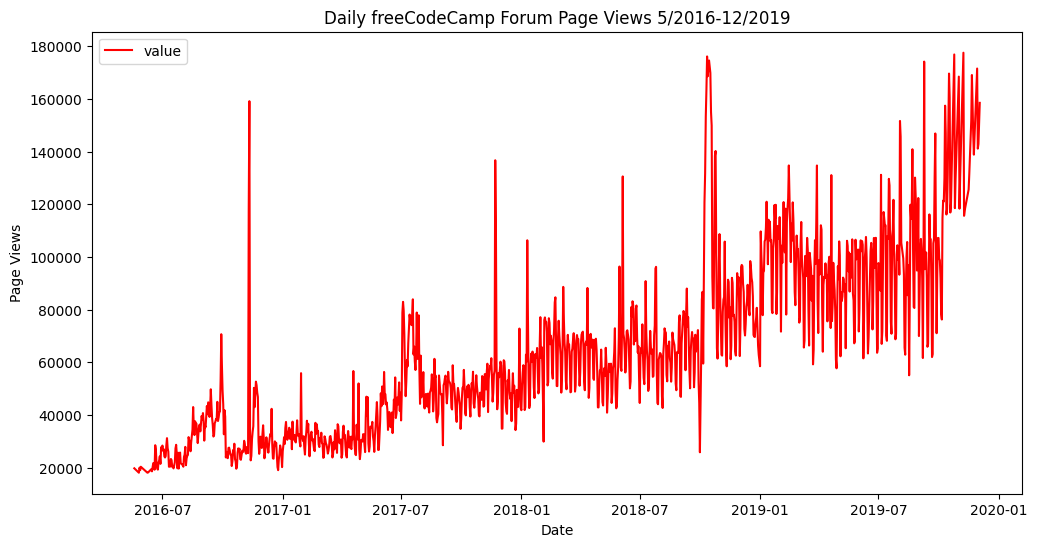

In [5]:
g =df.plot(kind='line', figsize=(12, 6), title='Daily freeCodeCamp Forum Page Views 5/2016-12/2019', xlabel='Date', ylabel='Page Views', color='red')
fig = g.get_figure()
fig.savefig('line_plot.png')
plt.show()

4. Creating a bar plot showing average daily page views for each month by years. 

In [6]:
df_bar = df.copy()
df_bar = df_bar.reset_index()
df_bar['year'] = df_bar['date'].apply(lambda x: x.year)
df_bar['month'] = df_bar['date'].apply(lambda x: x.strftime('%B'))
df_bar = df_bar.groupby(['year', 'month'])['value'].mean().unstack()

# order months in chronological order
df_bar = df_bar[['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']]

df_bar


month,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,19432.400000,21875.105263,24109.678571,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,111378.142857,78688.333333,80047.483871
2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,90435.642857,97236.566667,102717.310345,97268.833333,122802.272727,143166.428571,150733.500000


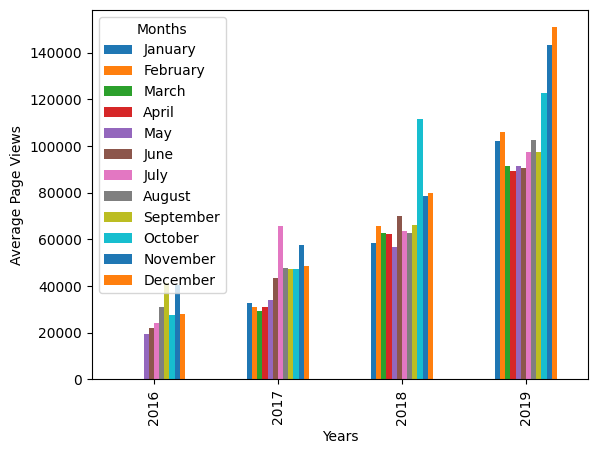

In [9]:
g = df_bar.plot(kind='bar')
plt.xlabel('Years')
plt.ylabel('Average Page Views')
plt.legend(title='Months')

fig = g.get_figure()
fig.savefig('bar_plot.png')

plt.show()

5. Creating box plots showing how the values are distributed within years and months. 

In [ ]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

df_box

,date,value,year,month
0,2016-05-19,19736,2016,May
1,2016-05-26,18060,2016,May
2,2016-05-27,19997,2016,May
3,2016-05-28,19044,2016,May
4,2016-05-29,20325,2016,May
...,...,...,...,...
1233,2019-11-24,138875,2019,Nov
1234,2019-11-29,171584,2019,Nov
1235,2019-11-30,141161,2019,Nov
1236,2019-12-01,142918,2019,Dec


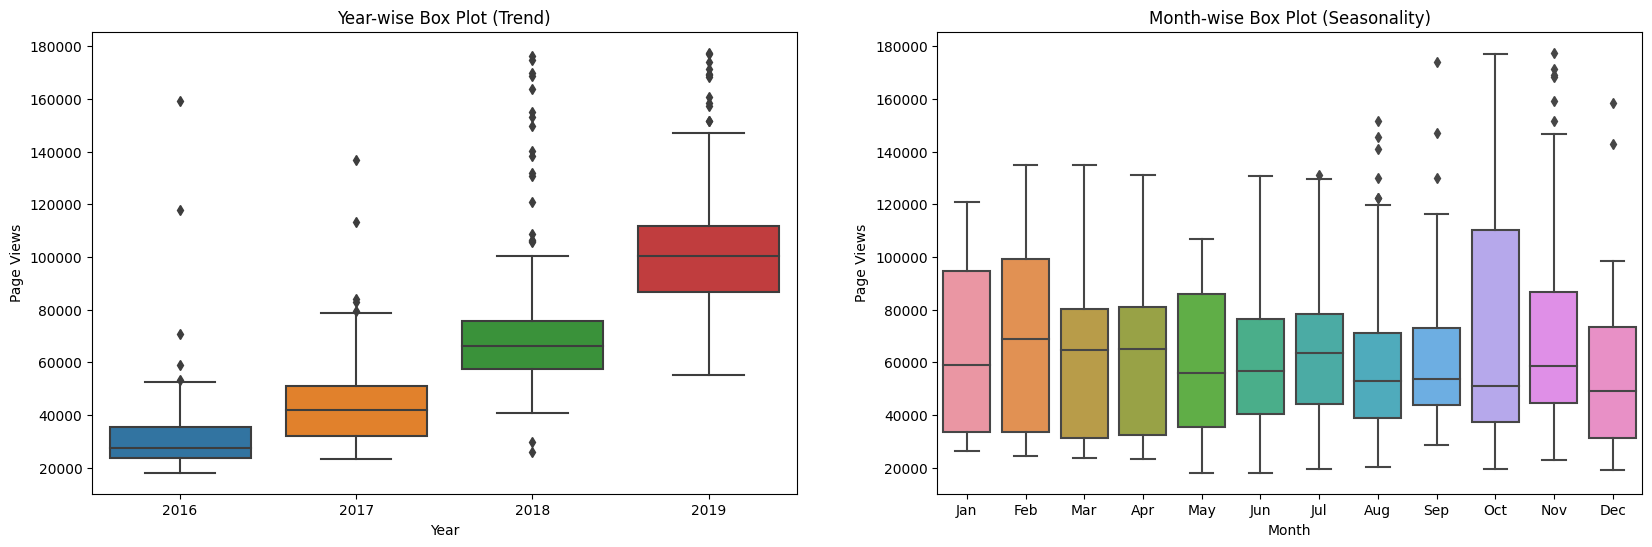

In [ ]:
# year-wise box plot (trend)
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
g = sns.boxplot(x='year', y='value', data=df_box)
plt.xlabel('Year')
plt.ylabel('Page Views')
plt.title('Year-wise Box Plot (Trend)')

# month-wise box plot (seasonality)
plt.subplot(1,2,2)
g = sns.boxplot(x='month', y='value', data=df_box, order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel('Month')
plt.ylabel('Page Views')
plt.title('Month-wise Box Plot (Seasonality)')

fig = g.get_figure()
fig.savefig('box_plot.png')
plt.show()

### Conclusions
1. **First line plot is showing upward trend of page views over the whole period of time.** <br>
* &emsp;*From mid 2018 there is a more significant grow in page views with a few high peaks, as popularity of FreeCodeCamp was growing.*<br>
2. **The growing tendency in average page views throughout the years is also displayed in second bar plot.**<br>
* &emsp;*There are months every year that tend to have much more page views. More or less it is visible in the end of each year, except e.g. july 2017 or september 2016.*<br>
3. **According to Year-wise Box plot, highest median and widest IQR in 2019, this year (2019) had highest and most variable forum activity.** <br>
* &emsp;*Slight increase in size of the boxes throughout the years suggests wider range of page views, which can mean more variability or more users.*<br>
* &emsp;*Increasing whiskers (both higher and lower) indicated bigger range of page views.*<br>
* &emsp;*More outliers (upwards from the top whiskers), specifically in years 2018 and 2019, may be due to more months/days with unusually high page views (e.g. because of specific events).*<br>
4. **According to Month-wise Box plot, there are clear variations in the distribution of page views across different months, which suggests potentional seasonal paterns.**
* &emsp;*Highest median is in february, which suggests high page views in february throughout all years. It may be due to some special events or education courses held in february anually.*
* &emsp;*June, August, September and December seem to have one of the lowest medians as well as narrower IQRs, in comparison to other months, suggesting less page views during the holidays.*
* &emsp;*Lowest medain of page views is in October. In addition, October has widest IQR and big whiskers (especially the top), which points to high variety in amount of page views in different years.*
* &emsp;*Many months have outliers, suggesting there are days with unusually high page views throughout the years.

